# single fully-connected neural layer

In [1]:
import keras
from keras import layers

# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32
input_img = keras.Input(shape=(784,))     # input image

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 7s 18ms/step - loss: 0.2745 - val_loss: 0.1885
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1692 - val_loss: 0.1519
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1430 - val_loss: 0.1328
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1281 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1184 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1117 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1067 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1030 - val_loss: 0.1002
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1003 - val_loss: 0.0979
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0982 - val_loss: 0

# visualize

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


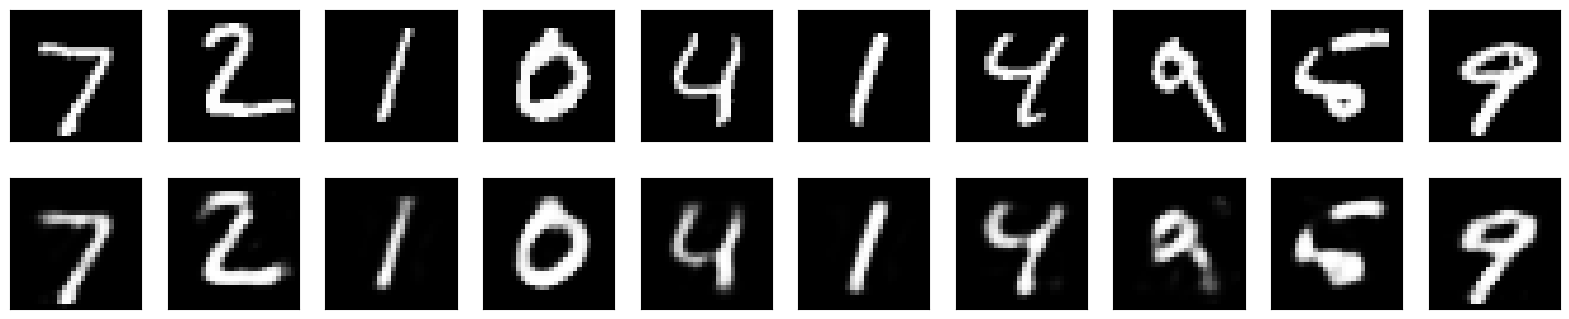

In [9]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Adding a sparsity constraint on the encoded representations

In [10]:
from keras import regularizers

encoding_dim = 32
input_img = keras.Input(shape=(784,))

# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [11]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

In [14]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
autoencoder.fit(x_train, x_train,
                epochs=50,        # epochs=100 (with the added regularization the model is less likely to overfit and can be trained longer)
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2877 - val_loss: 0.2004
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1790 - val_loss: 0.1618
Epoch 3/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1535 - val_loss: 0.1434
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1383 - val_loss: 0.1314
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1283 - val_loss: 0.1233
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1215 - val_loss: 0.1176
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1166 - val_loss: 0.1135
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1131 - val_loss: 0.1106
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1106 - val_loss: 0.1085
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1088 - val_loss

In [16]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


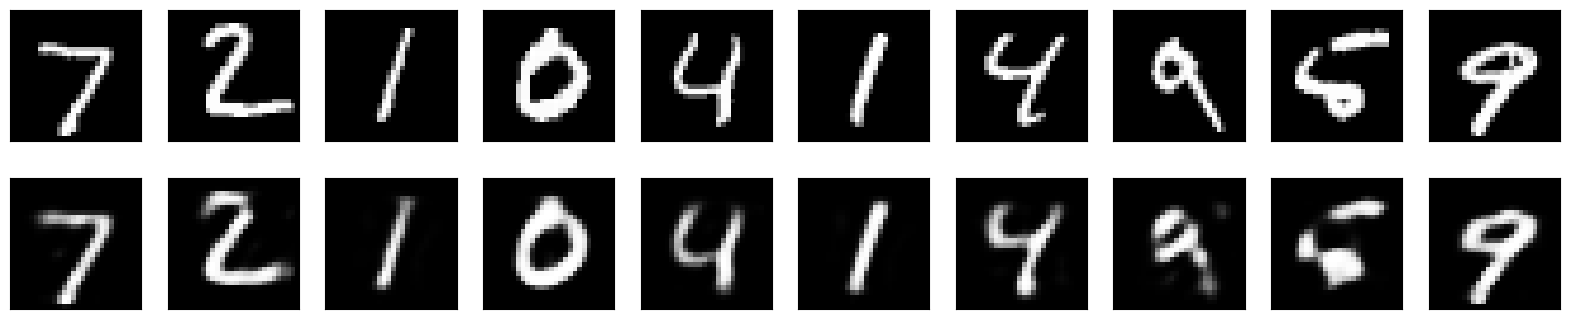

In [17]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Deep autoencoder

In [18]:
encoding_dim = 32
input_img = keras.Input(shape=(784,))     # input image

encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [19]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 15ms/step - loss: 0.2484 - val_loss: 0.1667
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1497 - val_loss: 0.1370
Epoch 3/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1327 - val_loss: 0.1260
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1231 - val_loss: 0.1179
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.1173 - val_loss: 0.1140
Epoch 6/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1130 - val_loss: 0.1099
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1096 - val_loss: 0.1068
Epoch 8/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1064 - val_loss: 0.1040
Epoch 9/100
235/235 [==============================] - 5s 23ms/step - loss: 0.1039 - val_loss: 0.1018
Epoch 10/100
235/235 [==============================] - 3s 13ms/step - loss: 0.102

# Convolutional autoencoder

In [20]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [22]:
!tensorboard --logdir=/tmp/autoencoder

2023-12-18 01:45:19.257618: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 01:45:19.257741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 01:45:19.261665: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 01:45:20.560526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to 

In [23]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 72s 150ms/step - loss: 0.2167 - val_loss: 0.1419
Epoch 2/50
469/469 [==============================] - 59s 126ms/step - loss: 0.1341 - val_loss: 0.1263
Epoch 3/50
469/469 [==============================] - 64s 135ms/step - loss: 0.1229 - val_loss: 0.1179
Epoch 4/50
469/469 [==============================] - 80s 172ms/step - loss: 0.1165 - val_loss: 0.1135
Epoch 5/50
469/469 [==============================] - 73s 156ms/step - loss: 0.1125 - val_loss: 0.1097
Epoch 6/50
469/469 [==============================] - 61s 129ms/step - loss: 0.1098 - val_loss: 0.1075
Epoch 7/50
469/469 [==============================] - 64s 136ms/step - loss: 0.1078 - val_loss: 0.1058
Epoch 8/50
469/469 [==============================] - 61s 131ms/step - loss: 0.1062 - val_loss: 0.1043
Epoch 9/50
469/469 [==============================] - 61s 130ms/step - loss: 0.1050 - val_loss: 0.1030
Epoch 10/50
469/469 [==============================] - 59s 127ms/step - l

313/313 [==============================] - 3s 10ms/step


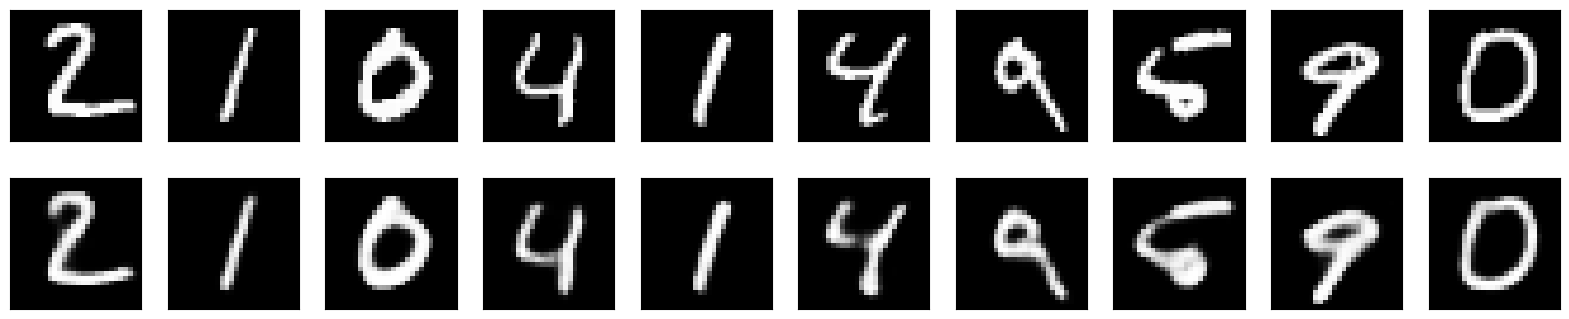

In [24]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Application to image denoising

In [25]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

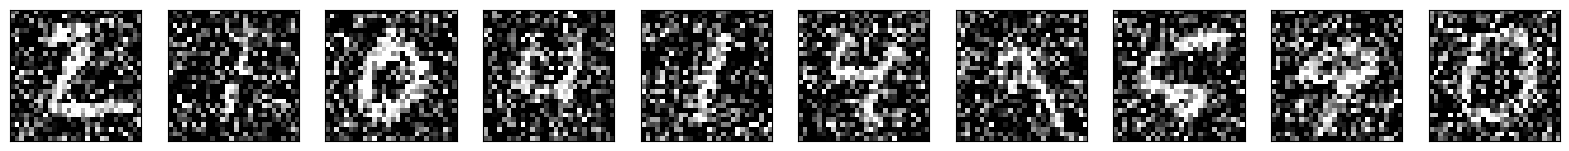

In [26]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

In [ ]:
n = 10
plt.figure(figsize=(20, 2))

for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()